## Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('outputs/run2.csv')
df_all

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_std,N,k,n,kappa_within_site,site_lat,outlier_rate,ignore_outliers,site_long
0,0,13.444262,10.472453,12.650866,20,20,1,66.069981,20,0.05,False,0
1,0,13.636998,10.086542,15.113210,20,20,1,66.069981,20,0.05,True,0
2,0,10.463606,8.219528,9.476130,20,10,2,66.069981,20,0.05,False,0
3,0,10.182151,7.925306,9.354259,20,10,2,66.069981,20,0.05,True,0
4,0,10.602228,8.380565,9.309705,22,11,2,66.069981,20,0.05,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0,8.575902,8.186754,4.630079,20,1,20,16.547426,70,0.10,True,0
1788,0,8.854723,8.143270,4.832805,40,2,20,16.547426,70,0.10,False,0
1789,0,6.841555,6.457996,3.553808,40,2,20,16.547426,70,0.10,True,0
1790,0,7.427831,6.976292,3.824085,60,3,20,16.547426,70,0.10,False,0


In [3]:
# df_1 = df_all[(df_all.k==1) & (~df_all.ignore_outliers)]
# df_7_out = df_all[(df_all.k==7) & (df_all.ignore_outliers)]

In [14]:
from scipy.ndimage.filters import gaussian_filter

def contour_from_pandas(df_):

    X = df_.columns.values
    Y = df_.index.values
    Z = df_.values
    #Z = gaussian_filter(Z, 2.0)
    
    x,y = np.meshgrid(X, Y)

    fig, ax = plt.subplots(figsize=(10,10))
    fig.set_size_inches(15,15)
    CS1 = ax.contour(x, y, Z, 10, colors='k', levels=np.arange(1.0, 11.0, 1.0))
    CS2 = ax.contourf(x, y, Z, 10, levels=CS1.levels, alpha=0.5)
    
    N = x * y
    CS3 = ax.contour(x, y, N, 6, colors='k', linestyles="dashed", levels=np.arange(0.0, 110.0, 10.0))

    ax.clabel(CS1, inline=True, fontsize=20)
    ax.clabel(CS3, inline=True, fontsize=10)
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xticks(df_.columns.values)
    ax.set_yticks(df_.index.values)
    ax.set_xlim([0, np.max(df_.columns.values)])
    ax.set_ylim([0, np.max(df_.index.values)])
    ax.plot()
    ax.set_xlabel('Number of Samples per Site (k)')
    ax.set_ylabel('Number of Sites (n)')
    fig.colorbar(CS2)

/tmp/ipykernel_5052/1649411816.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [15]:
all_kappa = np.unique(df_all.kappa_within_site.values)

df_filter = df_all[(df_all.site_lat==20) 
                   & (df_all.kappa_within_site==all_kappa[0])
                   & (df_all.outlier_rate==0.05) 
                   & (df_all.ignore_outliers==True)]

# Complete missing values for plot 


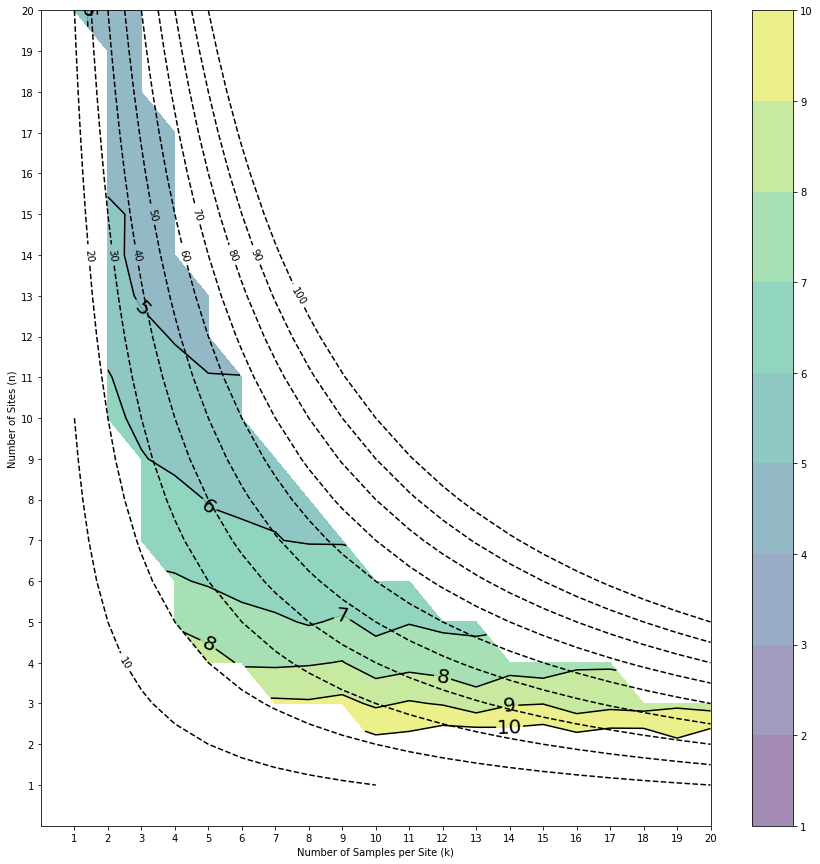

In [16]:
contour_from_pandas(df_filter.pivot('n', 'k', 'error_angle_mean'))

In [102]:
df_filter.pivot('n', 'k', 'error_angle_mean')

k,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
n,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.923702
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.346850,10.414961,10.932032,11.177940,10.782398,10.971334,10.637753,10.867722,10.927866,10.203719,10.890682
3,NaN,NaN,NaN,NaN,NaN,NaN,9.172035,9.115892,9.266323,8.842031,9.098630,8.922032,8.346629,8.904855,8.972169,8.457608,8.676979,8.551038,8.845402,8.581659
4,NaN,NaN,NaN,NaN,8.494785,7.870497,7.842166,7.912957,8.042076,7.465548,7.665210,7.520834,7.492106,7.589915,7.403293,7.902175,7.873628,NaN,NaN,NaN
5,NaN,NaN,NaN,7.840410,7.434532,7.251556,7.159900,6.912376,7.127762,6.749423,6.959587,6.812418,6.731486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,7.064935,6.932419,6.730060,6.464369,6.674744,6.382554,6.297229,6.157342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6.802539,6.736060,6.269945,6.269315,6.022816,5.933046,5.957285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,6.389091,6.391225,5.942749,5.753256,5.913371,5.738858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6.069606,5.730314,5.540627,5.491758,5.390581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
